In [7]:
import numpy as np
from scipy.linalg import block_diag
import itertools
import scipy as sc
import scipy.sparse as scs
from joblib import Parallel, delayed
import sys
import copy

In [8]:
h_el = scs.load_npz("h_el.npz")
h_mag = scs.load_npz("h_mag.npz")

In [9]:
g2 = 1

In [10]:
h_full = 1/g2*h_mag+g2*h_el

h_full_csr = h_full.tocsr()

In [11]:
scs.linalg.eigsh(h_full_csr, k=2, which="SA", return_eigenvectors=False)

array([-608.5275838, -611.5275838])

In [12]:
massgaps = []
g2s = np.linspace(8,0.5,31)
for i in g2s:
    h_full = 1/i*h_mag+i*h_el
    h_full_csr = h_full.tocsr()
    e2,e1 = scs.linalg.eigsh(h_full_csr, k=2, which="SA", return_eigenvectors=False)
    massgaps.append(e2-e1)

In [13]:
import matplotlib.pyplot as plt

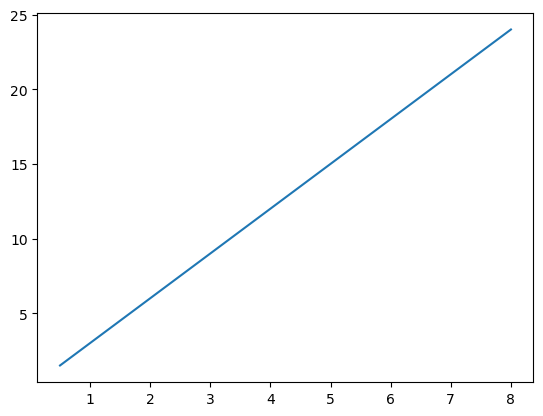

In [14]:
plt.plot(g2s, massgaps)

In [15]:
np.savetxt("massgaps2.txt", massgaps)